In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style('darkgrid')

In [86]:

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

N = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 10.0 # infections lasts four days
gamma = 1.0 / D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

In [89]:
from scipy.integrate import odeint

t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

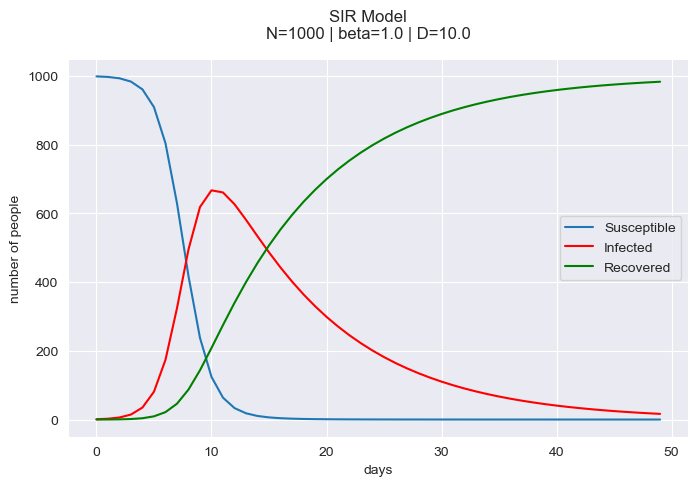

In [90]:
fig, ax = plt.subplots(1,1, figsize=(8,5), dpi=100)

ax.plot(S, label='Susceptible')
ax.plot(I, c='r', label='Infected')
ax.plot(R, c='g', label='Recovered')

plt.ylabel('number of people')
plt.xlabel('days')
plt.suptitle(f'SIR Model\nN={N} | beta={beta} | D={D}')
plt.legend()
plt.show()